
Decision Tree Results:
Accuracy: 1.0
Confusion Matrix:
 [[705   0]
 [  0 424]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129

ROC-AUC Score: 1.0

Naive Bayes Results:
Accuracy: 0.7094774136403897
Confusion Matrix:
 [[697   8]
 [320 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.99      0.81       705
           1       0.93      0.25      0.39       424

    accuracy                           0.71      1129
   macro avg       0.81      0.62      0.60      1129
weighted avg       0.78      0.71      0.65      1129

ROC-AUC Score: 0.9575471698113207


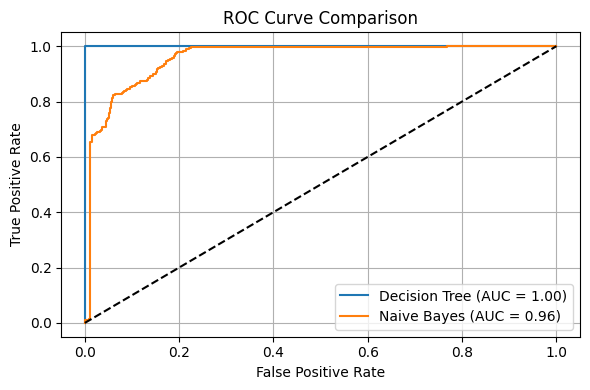


Metric Comparison Table:
           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Decision Tree  1.000000   1.000000  1.000000   1.00000  1.000000
1    Naive Bayes  0.709477   0.928571  0.245283   0.38806  0.957547


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df = pd.read_csv(url, names=columns)
df = df.replace('?', pd.NA).dropna()

# Encode categorical features
df_encoded = df.apply(LabelEncoder().fit_transform)
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

# Evaluation function
def evaluate_model(name, y_test, y_pred, y_proba):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

evaluate_model("Decision Tree", y_test, y_pred_dt, y_proba_dt)
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_proba_nb)

# ROC Curve plotting
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_dt)))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_nb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparison Table
metrics = {
    "Model": ["Decision Tree", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_nb)
    ],
    "Precision": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_nb, output_dict=True)['1']['precision']
    ],
    "Recall": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_nb, output_dict=True)['1']['recall']
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_nb, output_dict=True)['1']['f1-score']
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_nb)
    ]
}

df_metrics = pd.DataFrame(metrics)
print("\nMetric Comparison Table:")
print(df_metrics)
